In [ ]:
from google.colab import drive
drive.mount('/content/drive')
way = "/content/drive/MyDrive/Colab_Notebooks/machinkaOE/"

Mounted at /content/drive


# Машинное обучение 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
salary_data = pd.read_csv(way + 'data_1.csv')
print(salary_data.head(5))
print(salary_data.shape)

             region_name  salary
0         Алтайский край   25960
1       Амурская область   43156
2  Архангельская область   47526
3   Астраханская область   32166
4   Белгородская область   31163
(85, 2)


In [ ]:
crushed_salary_data = salary_data[~salary_data['region_name'].isin(['Смоленская область', 'Чувашская Республика', 'Костромская область', 'Саратовская область'])]
crushed_salary_data.shape

(81, 2)

In [ ]:
sorted_csd = crushed_salary_data.sort_values('salary')
sorted_csd.head(10)

,region_name,salary
49,Республика Дагестан,24550
17,Кабардино-Балкарская Республика,25318
50,Республика Ингушетия,25663
21,Карачаево-Черкесская Республика,25699
51,Республика Калмыкия,25719
0,Алтайский край,25960
15,Ивановская область,26053
58,Республика Северная Осетия-Алания,26108
80,Чеченская Республика,26108
70,Тамбовская область,26754


In [ ]:
print(sorted_csd.iloc[8])
print(sorted_csd.iloc[52])
print(sorted_csd.iloc[55])
print(sorted_csd.mean())
print(sorted_csd.median())

region_name    Чеченская Республика
salary                        26108
Name: 80, dtype: object
region_name    Кемеровская область
salary                       37857
Name: 22, dtype: object
region_name    Калужская область
salary                     38005
Name: 19, dtype: object
salary    39377.851852
dtype: float64
salary    33137.0
dtype: float64


<ipython-input-17-1e773511d2d5>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sorted_csd.mean())
<ipython-input-17-1e773511d2d5>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sorted_csd.median())


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize


chat_id = 123456 # Ваш chat ID, не меняйте название переменной

def neg_log_likelihood(acceleration, distances, time):
    errors = distances - acceleration * (time**2) / 2
    return np.sum(np.abs(errors))

def solution(x: np.array) -> float:
  time = 51
  accelerations = 2 * (x / time**2)
  acceleration = accelerations.mean()
  errors = x - acceleration * (time**2) / 2
  errors_sum = np.sum(np.abs(errors))
  result = minimize(neg_log_likelihood, 0, args=(x, time))

  return result.x[0]


intro = np.array([51, 53, 54, 55])
solution(intro)

0.04080029850941348

In [ ]:
import numpy as np
from scipy.optimize import minimize

distances = np.array(<ВАШ_ОДНОМЕРНЫЙ_МАССИВ_С_ДИСТАНЦИЯМИ>)
time = 51

def neg_log_likelihood(acceleration, distances, time):
    errors = distances - acceleration * (time**2) / 2
    return np.sum(np.abs(errors))

# Начальное значение ускорения для оптимизации
initial_acceleration = 0.1

# Минимизация отрицательного логарифмического правдоподобия
result = minimize(neg_log_likelihood, initial_acceleration, args=(distances, time))

# Оценка ускорения
estimated_acceleration = result.x[0]

0.04086384532732346

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def solution(p: float, x: np.array) -> tuple:
  q = 1 - p
  loc = 0
  n = len(x)
  sum_variance = np.sum((x - loc)**2)
  lower_bound_chi2 = chi2.ppf(q / 2, 2 * n)
  upper_bound_chi2 = chi2.ppf(1 - q / 2, 2 * n)

  lower_bound_variance = sum_variance / upper_bound_chi2
  upper_bound_variance = sum_variance / lower_bound_chi2

  lower_ans = np.sqrt(lower_bound_variance / 18)
  upper_ans = np.sqrt(upper_bound_variance / 18)
  return lower_ans, upper_ans

solution(0.95, np.array([0, 1, 2, 0.5, 0.8, 1,2]))

(0.15219481132312102, 0.3278480683933604)

In [ ]:
alpha = 1 - 0.9
chi2.ppf(alpha / 2, 9)

3.325112843066815

In [ ]:
test = np.array([0, 1, 2, 0.5, 0.8, 1,2])
print(np.sum((test - 0)**2))
print(np.sum((test - test.mean())**2))
print(test.var())

10.89
10.739665306122449
0.46816326530612246


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def solution(p: float, x: np.array) -> tuple:
  q = 1 - p
  loc = np.mean(x**2)

  n = len(x)
  sigma_mle = loc / np.sqrt(np.pi / 2)

  lower_bound_chi2 = chi2.ppf(q / 2, n - 1)
  upper_bound_chi2 = chi2.ppf(1 - q / 2, n - 1)

  lower_bound_sigma = (n - 1) * sigma_mle**2 / upper_bound_chi2
  upper_bound_sigma = (n - 1) * sigma_mle**2 / lower_bound_chi2

  lower_ans = np.sqrt(lower_bound_sigma / 18)
  upper_ans = np.sqrt(upper_bound_sigma / 18)
  return lower_ans, upper_ans

solution(0.95, np.array([0, 1, 2, 0.5, 0.8, 1,2]))

(0.18853185370258466, 0.6442642043126914)

# Машинное обучение 2, главные компоненты

In [ ]:
import pandas as pd
import numpy as np
df49 = pd.read_csv(way + "49_25.csv", header = None)
df49.head(5)

,0,1,2,3,4,5,6,7,8,9
0,8.696454,8.806511,21.863143,4.765461,-8.010448,-1.769030,18.948403,-13.141738,-10.136112,-21.604179
1,9.435582,10.423230,21.265049,4.957357,-7.422432,-2.966882,20.342453,-13.015212,-10.127642,-21.308425
2,9.085047,11.318838,22.496315,5.148429,-5.248281,-5.460963,20.652435,-11.970082,-7.785083,-20.202386
3,-12.898572,21.496056,16.656680,6.630723,26.115214,22.972380,16.432983,21.199253,7.331391,-5.667719
4,4.103203,-2.374788,-2.314852,-6.169016,-17.832143,20.895702,0.648545,15.755071,2.656736,-23.249290


In [ ]:
df49_centr = df49 - df49.mean()
df49_cov = df49_centr.cov()
df49_cov

,0,1,2,3,4,5,6,7,8,9
0,104.854187,-14.485005,-56.355604,-28.201900,-80.009845,-83.807983,37.378583,-81.401960,-87.276602,-112.003469
1,-14.485005,144.253491,31.707999,-21.496073,71.774091,34.040367,74.879714,86.309198,-24.729003,-69.877713
2,-56.355604,31.707999,126.766637,34.090840,21.380083,10.208280,-5.662759,-13.521951,37.184484,80.165687
3,-28.201900,-21.496073,34.090840,93.111982,103.668124,-78.539292,17.752097,-115.830707,10.229587,127.804696
4,-80.009845,71.774091,21.380083,103.668124,241.882961,-32.756916,64.841441,-27.567171,27.149016,139.624424
5,-83.807983,34.040367,10.208280,-78.539292,-32.756916,195.955852,-68.767018,238.719138,91.896531,-24.909556
6,37.378583,74.879714,-5.662759,17.752097,64.841441,-68.767018,86.135317,-49.517175,-64.123103,-46.637914
7,-81.401960,86.309198,-13.521951,-115.830707,-27.567171,238.719138,-49.517175,321.276435,83.134154,-91.181456
8,-87.276602,-24.729003,37.184484,10.229587,27.149016,91.896531,-64.123103,83.134154,93.285566,96.962675
9,-112.003469,-69.877713,80.165687,127.804696,139.624424,-24.909556,-46.637914,-91.181456,96.962675,261.724181


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(df49_cov)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues

array([666.13170518, 549.08051794, 313.61893927, 128.15319904,
         3.41671342,   2.60550469,   2.19519091,   1.0285174 ,
         1.55727131,   1.45904974])

In [ ]:
first_pc_index = np.argmax(eigenvalues)
first_pc = eigenvectors[:, first_pc_index]
first_object = df49_centr.iloc[0].to_numpy()
np.dot(first_object, first_pc)

-3.5787987614847623

In [ ]:
second_pc_index = sorted_indices[1]
second_pc = eigenvectors[:, second_pc_index]

first_object = df49_centr.iloc[0].to_numpy()
np.dot(first_object, second_pc)

-23.189209820204802

In [ ]:
(eigenvalues[0:3].sum()) / eigenvalues.sum()

0.9158809454741212

In [ ]:
first_two_pc = eigenvectors[0:2].T
new_df49 = pd.DataFrame(np.dot(df49_centr, first_two_pc))

<function matplotlib.pyplot.show(close=None, block=None)>

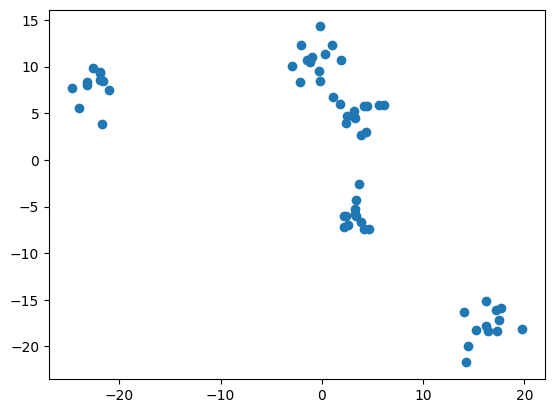

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(new_df49[0], new_df49[1])
plt.show

In [ ]:
df_counts = pd.read_csv(way + 'X_reduced_417.csv', sep = ';', header = None)
df_wei = pd.read_csv(way + 'X_loadings_417.csv', sep = ';', header = None)
df_counts.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898
1,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898
2,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898
3,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898
4,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898


In [ ]:
df_f = np.dot(df_counts, df_wei.T)
df_f = pd.DataFrame(df_f)

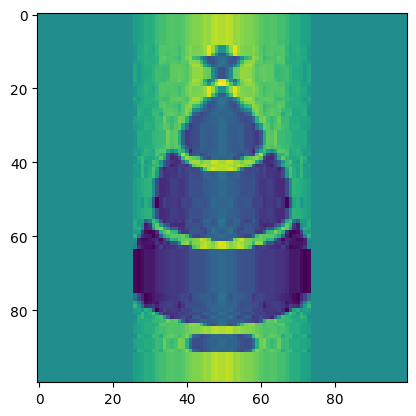

In [ ]:
plt.imshow(df_f)

# Машинное обучение 3

In [ ]:
import pandas as pd
import numpy as np
df3 = pd.read_csv(way + 'task3.csv')
df3 = df3.set_index('id')
df3

,X,Y
id,,
1,9,15
2,4,9
3,17,41
4,2,1
5,14,32
6,10,22
7,13,30
8,1,4
9,11,31


In [ ]:
df3_mean = df3.mean()
df3_mean

X     8.4
Y    19.3
dtype: float64

In [ ]:
df3_er = df3.assign(x_er = df3['X'] - df3_mean['X'], y_er = df3['Y'] - df3_mean['Y'])
df3_er = df3_er.assign(xy_er = df3_er['x_er'] * df3_er['y_er'], xx_er =  df3_er['x_er'] *  df3_er['x_er'])
q_1 = df3_er['xy_er'].sum() / df3_er['xx_er'].sum()
q_0 = df3_mean['Y'] - q_1 * df3_mean['X']
print(q_1, q_0)

2.410128388017118 -0.9450784593437902


In [ ]:
df3['pred'] = q_0 + q_1 * df3['X']
SSE = sum((df3['Y'] - df3['pred'])**2)
SST = sum((df3['Y'] - df3_mean['Y'])**2)
1 - (SSE / SST)

0.9513257196553756

# МАшинное обучение 4

In [ ]:
import pandas as pd
import numpy as np
df4 = pd.read_csv(way + 'task4.csv')
df4 = df4.set_index('d')
df4

,X,Y,Class
d,,,
1,96,95,0
2,15,17,0
3,85,76,0
4,70,37,0
5,64,64,0
6,62,24,1
7,48,45,1
8,75,99,1
9,95,58,0


In [ ]:
nx = 39
ny = 22
df4['evk'] = ((df4['X'] - nx) ** 2 + (df4['Y'] - ny) ** 2) ** (1/2)
df4['manh'] = pd.Series(np.abs(df4['X'] - nx) + np.abs(df4['Y'] - ny))
df4

,X,Y,Class,evk,manh
d,,,,,
1,96,95,0,92.617493,130
2,15,17,0,24.515301,29
3,85,76,0,70.936591,100
4,70,37,0,34.438351,46
5,64,64,0,48.877398,67
6,62,24,1,23.086793,25
7,48,45,1,24.698178,32
8,75,99,1,85.000000,113
9,95,58,0,66.573268,92


# Дз гипотезы

In [ ]:
def should_implement_new_script(control_applications, control_sales, test_applications, test_sales):
    control_conversion_rate = control_sales / control_applications
    test_conversion_rate = test_sales / test_applications

    control_std_dev = np.sqrt(control_conversion_rate * (1 - control_conversion_rate) / control_applications)
    test_std_dev = np.sqrt(test_conversion_rate * (1 - test_conversion_rate) / test_applications)

    alpha = 0.02

    t_statistic, p_value = ttest_ind_from_stats(mean1=control_conversion_rate, std1=control_std_dev, nobs1=control_applications,
                                                mean2=test_conversion_rate, std2=test_std_dev, nobs2=test_applications)

    return p_value < alpha

# Пример использования функции:
control_applications = 1000
control_sales = 50
test_applications = 1000
test_sales = 70

result = should_implement_new_script(control_applications, control_sales, test_applications, test_sales)
print(result)  # Вернет True или False в зависимости от теста

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

chat_id = 461750643 # Ваш chat ID, не меняйте название переменной

def solution(x_success: int,
             x_cnt: int,
             y_success: int,
             y_cnt: int) -> bool:
    alpha = 0.02
    control_conversion = x_success / x_cnt
    test_conversion = y_success / y_cnt

    control_std_dev = np.sqrt(control_conversion * (1 - control_conversion) / x_cnt)
    test_std_dev = np.sqrt(test_conversion * (1 - test_conversion) / y_cnt)
    standard_error = np.sqrt(control_std_dev**2 + test_std_dev**2)

    z_statistic = (test_conversion - control_conversion) / standard_error
    p_value = 1 - stats.norm.cdf(abs(z_statistic))

    return p_value / 4 < alpha and z_statistic > 0


In [ ]:
result = solution(84, 3000, 100, 3000)
print(result)

False


In [ ]:
import numpy as np
from scipy import stats

def z_test(control_leads, control_sales, test_leads, test_sales, alpha=0.02):
    # Расчёт конверсии для контрольной и тестовой групп
    control_conversion = control_sales / control_leads
    test_conversion = test_sales / test_leads

    # Расчёт стандартного отклонения и стандартной ошибки
    control_std_dev = np.sqrt(control_conversion * (1 - control_conversion) / control_leads)
    test_std_dev = np.sqrt(test_conversion * (1 - test_conversion) / test_leads)
    standard_error = np.sqrt(control_std_dev**2 + test_std_dev**2)

    # Расчёт z-статистики и p-значения
    z_statistic = (test_conversion - control_conversion) / standard_error
    p_value = 1 - stats.norm.cdf(abs(z_statistic))

    # Возвращает логическое значение: True - внедрять новый скрипт, False - не внедрять
    return p_value / 4 < alpha and z_statistic > 0

# Ввод данных
control_leads = 1000
control_sales = 100
test_leads = 1000
test_sales = 80

# Выполнение z-теста и вывод результата
if z_test(control_leads, control_sales, test_leads, test_sales):
    print("Внедряем новый скрипт: статистически значимое различие в конверсии")
else:
    print("Не внедряем новый скрипт: статистически значимого различия в конверсии нет")


Не внедряем новый скрипт: статистически значимого различия в конверсии нет


In [ ]:
import pandas as pd
hist = pd.read_csv(way + 'historical_data.csv')
df1 = pd.read_csv(way + 'modified_data_of_type_1.csv')
df2 = pd.read_csv(way + 'modified_data_of_type_2.csv')
df3 = pd.read_csv(way + 'modified_data_of_type_3.csv')
hist.shape


(200, 301)

In [ ]:
!pip install hyppo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hyppo: filename=hyppo-0.3.2-py3-none-any.whl size=134082 sha256=fa0b90c1a004439f12e10610e01f596e94900cb10785b7b2cb9654d05f0047c2
  Stored in directory: /root/.cache/pip/wheels/da/7d/db/9b769ba455615350f1ce016c61e98388f6dc18e1be2403f826
Successfully built hyppo


In [ ]:
import pandas as pd
import numpy as np
from hyppo.ksample import MMD


chat_id = 461750643 # Ваш chat ID, не меняйте название переменной

def solution(x: np.array, y: np.array) -> bool:
    alpha = 0.01
    stat, pvalue = MMD(gamma=1).test(x, y)
    return pvalue < alpha # Ваш ответ, True или False

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
import torch
from hyppo.ksample import MMD

ans = []
for i in range(0, hist.shape[0]):
  samp1 = hist.iloc[i].to_numpy()
  samp2 = df1.iloc[i].to_numpy()
  ans.append(solution(samp1, samp2))
it = 0
for i in ans:
  it += 1 if i == True else 0
it

104

In [ ]:
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import cramervonmises_2samp

alpha = 0.01
ans = []
for i in range(0, hist.shape[0]):
  samp1 = hist.iloc[i].to_numpy()
  samp2 = df1.iloc[i].to_numpy()
  val = ks_2samp(samp1, samp2)
  ans.append(solution(samp1, samp2))
it = 0
for i in ans:
  it += 1 if i == True else 0
it

38

In [ ]:
import pandas as pd
hist2 = pd.read_csv(way + 'hyp3_historical_data.csv')
hist2_np = hist2.to_numpy()
hist2_np = hist2_np[0:1, 1:hist2_np.shape[1]]
hist2_np = hist2_np[0].astype(float)
hist2_np

array([518.15900975, 469.61232972, 413.22924897, ..., 463.23231186,
       483.76234453, 511.54368752])

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp


chat_id = 461750643 # Ваш chat ID, не меняйте название переменной

def solution(x: np.array) -> bool: # Одна или две выборке на входе, заполняется исходя из условия
    alpha = 0.02
    expect_mean = 500
    t_stat, p_value = ttest_1samp(x, expect_mean)
    return (p_value < alpha and t_stat > 0) # Ваш ответ, True или False

In [ ]:
from scipy.stats import shapiro
sampl1 = np.random.uniform(low=520.5, high=540.3, size=(50,))
solution(sampl1)

True

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

chat_id = 461750643 # Ваш chat ID, не меняйте название переменной

def solution(x: np.array) -> bool: # Одна или две выборке на входе, заполняется исходя из условия
    # исторические данные о затратах на аналогичную подписку
    costs = x

    # задаем уровень значимости
    alpha = 0.02

    # задаем порог затрат на подписку
    threshold = 500

    # выполняем одновыборочный t-тест
    t_statistic, p_value = ttest_1samp(costs, threshold)

    # проверяем гипотезу на уровне значимости alpha
    return(p_value/2 < alpha and t_statistic < 0)

In [ ]:
#образец

import numpy as np
from scipy.stats import ks_2samp

# Создайте две независимые выборки
sample1 = np.array([1.2, 1.5, 2.1, 2.4, 2.7, 3.0])
sample2 = np.array([1.8, 2.0, 2.3, 2.6, 3.1, 3.4])

# Выполните двухвыборочный Колмогорова-Смирнова тест
ks_statistic, p_value = ks_2samp(sample1, sample2)

# Уровень значимости (например, 0.05)
alpha = 0.05

# Решение о принятии или отклонении нулевой гипотезы
if p_value < alpha:
    print("Отклонить нулевую гипотезу: две выборки имеют различное распределение.")
else:
    print("Принять нулевую гипотезу: две выборки взяты из одного и того же распределения.")


Принять нулевую гипотезу: две выборки взяты из одного и того же распределения.


# АБ тесты